# Import required modules and load data file

In [83]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")


fruits = pd.read_table('./fruits_data_with_colors.txt')

In [84]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [85]:
fruits

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [86]:
fruits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [87]:
fruits.shape

(59, 7)

In [88]:
lookup_fruits_name = dict(zip(fruits.fruit_label.unique(),fruits.fruit_name.unique()))
lookup_fruits_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

# Create train-test split

In [89]:
X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']


# Set random_state value so that we get consistance X_train, X_test, y_train, y_test everytime we run this command
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Create classifier object

In this section, we gonna use n different classification models:
* K Nearest Neighbor
* Decision Tree
* Random Forest

## KNN Classifier
The K-Nearest Neighbour or the KNN is a machine learning algorithm based on the supervised learning model. Assuming that similar things have kinda similar value, or we can say "close to each other". We set the k_neighbor value so that the algorthim can work. This algorthim works by first find k thing(s) that are close to the test thing, then see what kind of things that dominate in those k thing(s) in number, then the test result will be that dominateed thing. That why k_neighbor should be an odd number.

In [90]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

### Train the classifier (fit the estimator) using the trainning data

In [91]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Estimate the accuracy of the classifier on future data, using test data

In [92]:
knn.score(X_test, y_test)

0.5333333333333333

### Use the trained k-NN classifier model to classify new, previously unseen objects

In [93]:
fruit_prediction = knn.predict([[20, 4.3, 5.5, 0.75]])
lookup_fruits_name[fruit_prediction[0]]

'mandarin'

In [94]:
fruit_prediction = knn.predict([[100, 6.3, 8.5, 0.75]])
lookup_fruits_name[fruit_prediction[0]]

'lemon'

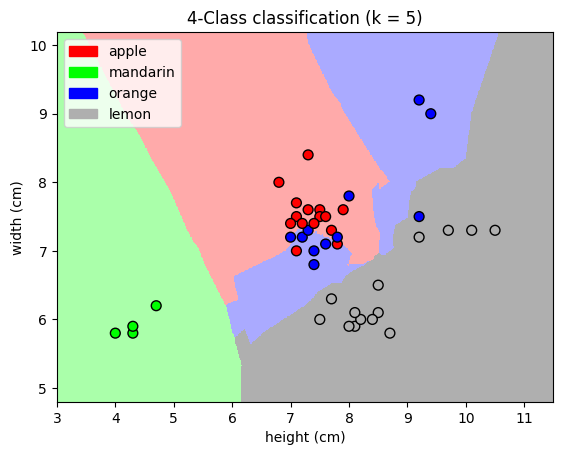

In [95]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

def plot_fruit_knn(X, y, n_neighbors):
    X_mat = X[['height', 'width']].values
    y_mat = y.values
# Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])
    clf = KNeighborsClassifier(n_neighbors)
    clf.fit(X_mat, y_mat)
# Plot the decision boundary by assigning a color in the color map
    # to each mesh point.

    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50

    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])
    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')
    plt.title("4-Class classification (k = %i)" % (n_neighbors))    
    plt.show()
plot_fruit_knn(X_train, y_train, 5)

## Decision Tree Classifier

The Decision Tree is a machine learning algorithm which contain multiple node that split the data base on features value, the first node is called the root node, use for split data. Nodes that point to other nodes are use to split the data too. Nodes that point to no other nodes are call leave node, and are use for predicting.

In [96]:
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz, plot_tree

dt=DecisionTreeClassifier()

### Train the classifier (fit the estimator) using the trainning data

In [97]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

### Estimate the accuracy of the classifier on future data, using test data

In [98]:
dt.score(X_test, y_test)

0.6666666666666666

### Use the trained Decision Tree classifier model to classify new, previously unseen objects

In [99]:
fruit_prediction = dt.predict([[20, 4.3, 5.5, 0.75]])
lookup_fruits_name[fruit_prediction[0]]

'mandarin'

### Display and export trained decision tree

In [100]:
with open('tree.txt', 'w') as f:
    f.write(export_text(dt))
export_graphviz(dt, out_file='tree.dot')

[Text(0.5555555555555556, 0.9285714285714286, 'X[2] <= 7.95\ngini = 0.712\nsamples = 44\nvalue = [15, 4, 11, 14]'),
 Text(0.3333333333333333, 0.7857142857142857, 'X[1] <= 7.35\ngini = 0.625\nsamples = 28\nvalue = [15, 4, 7, 2]'),
 Text(0.2222222222222222, 0.6428571428571429, 'X[2] <= 5.85\ngini = 0.695\nsamples = 16\nvalue = [3, 4, 7, 2]'),
 Text(0.1111111111111111, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0, 0]'),
 Text(0.3333333333333333, 0.5, 'X[1] <= 6.55\ngini = 0.569\nsamples = 12\nvalue = [3, 0, 7, 2]'),
 Text(0.2222222222222222, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 2]'),
 Text(0.4444444444444444, 0.35714285714285715, 'X[3] <= 0.85\ngini = 0.42\nsamples = 10\nvalue = [3, 0, 7, 0]'),
 Text(0.3333333333333333, 0.21428571428571427, 'X[3] <= 0.725\ngini = 0.219\nsamples = 8\nvalue = [1, 0, 7, 0]'),
 Text(0.2222222222222222, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0]'),
 Text(0.4444444444444444, 0.07142857142857142, 'gini = 0.

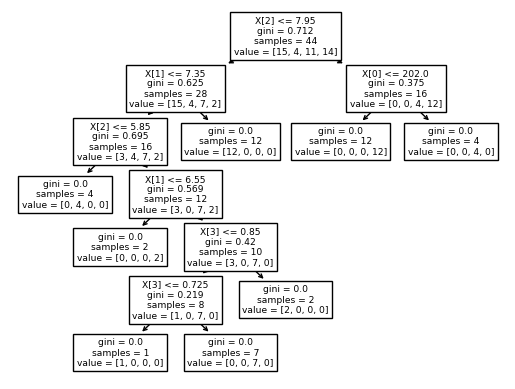

In [101]:
plot_tree(dt)

## Random Forest Classifier

In [102]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators=100, criterion="entropy")

### Train the classifier (fit the estimator) using the trainning data

In [103]:
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

### Estimate the accuracy of the classifier on future data, using test data

In [104]:
rfc.score(X_test, y_test)

0.8666666666666667

### Use the trained Decision Tree classifier model to classify new, previously unseen objects

In [105]:
fruit_prediction = rfc.predict([[20, 4.3, 5.5, 0.75]])
lookup_fruits_name[fruit_prediction[0]]

'mandarin'

## Confusion Matrix

In [106]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

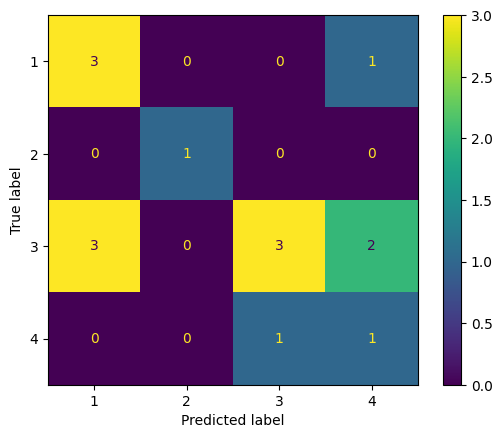

In [107]:
matrix=plot_confusion_matrix(knn,X_test,y_test)

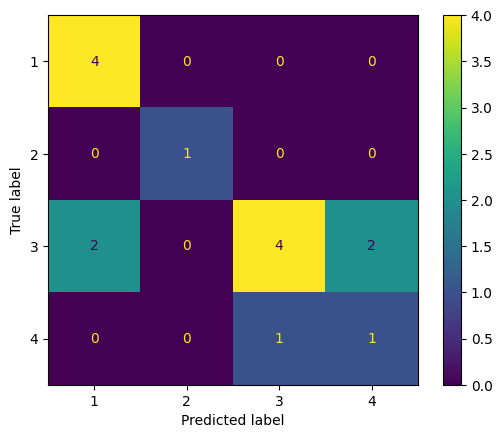

In [108]:
matrix=plot_confusion_matrix(dt,X_test,y_test)

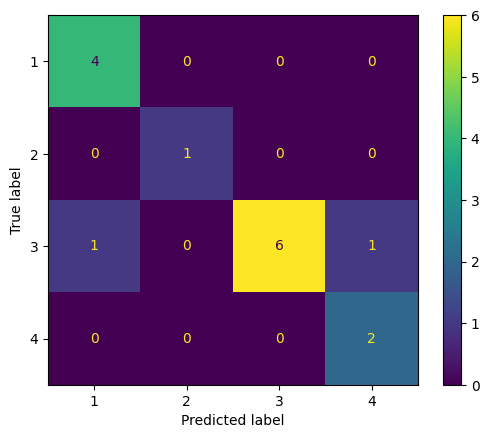

In [109]:
matrix=plot_confusion_matrix(rfc,X_test,y_test)